# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

processing_record = 1 

print(f"Beginning Data Retrieval")
print(f"---------------------------------")

# Loop through each city
for city in cities:
    
    # try to get the response for each city
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # increase record counting by 1
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    pass

print(f"----------------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------------")

{
    "coord": {
        "lon": 168.3333,
        "lat": -46.6
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 12.11,
        "feels_like": 11.39,
        "temp_min": 12.11,
        "temp_max": 12.11,
        "pressure": 1015,
        "humidity": 77,
        "sea_level": 1015,
        "grnd_level": 1012
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.21,
        "deg": 198,
        "gust": 7.87
    },
    "clouds": {
        "all": 100
    },
    "dt": 1644710469,
    "sys": {
        "type": 2,
        "id": 2008959,
        "country": "NZ",
        "sunrise": 1644688612,
        "sunset": 1644739507
    },
    "timezone": 46800,
    "id": 2206939,
    "name": "Bluff",
    "cod": 200
}
Beginning Data Retrieval
---------------------------------
City not found. Skipping...
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# create dataframe
weather_data = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}

weather_DF = pd.DataFrame(weather_data)
weather_DF.to_csv("Weather_Output.csv")

# display dataframe
weather_DF

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,17.80,60,0,5.69,AU,1644710528
1,Castro,-24.7911,-50.0119,17.73,69,32,2.87,BR,1644710260
2,Vanimo,-2.6741,141.3028,27.46,80,70,1.27,PG,1644710528
3,Makkah al Mukarramah,21.4267,39.8261,21.80,30,0,5.98,SA,1644710029
4,Constitución,-35.3333,-72.4167,16.01,82,1,3.13,CL,1644710456
...,...,...,...,...,...,...,...,...,...
577,Dzhebariki-Khaya,62.2167,135.8000,-36.03,100,100,0.70,RU,1644710691
578,Tandil,-37.3217,-59.1332,12.39,62,5,3.10,AR,1644710692
579,Kendari,-3.9450,122.4989,23.73,94,100,1.99,ID,1644710692
580,Phan Thiet,10.9333,108.1000,24.63,73,63,2.89,VN,1644710514


In [61]:
weather_DF.agg(["count","mean","std","min","max"])

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,582,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582,5.820000e+02
mean,NaN,21.175698,21.016526,8.542749,74.890034,61.307560,3.269192,NaN,1.644711e+09
std,NaN,33.447826,90.101396,17.778443,20.944027,39.208607,2.352928,NaN,8.516909e+01
min,Aasiaat,-54.800000,-179.166700,-39.890000,9.000000,0.000000,0.000000,AI,1.644710e+09
max,‘Ewa Beach,78.218600,179.316700,32.060000,100.000000,100.000000,13.890000,ZW,1.644711e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

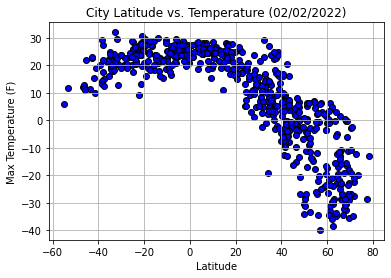

As we expected, the weather becomes significantly warmer as one approaches the equator (0 Degrees Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the norther hemisphere. This may be due to the tilt of the earth at the time of the year this data was gathered.


<Figure size 432x288 with 0 Axes>

In [62]:
# Create a scatter plot for latitude vs temperature
plt.scatter(weather_DF["Latitude"], weather_DF["Temp"], facecolors="blue", marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Temperature (02/02/2022)")
plt.grid()

plt.show()
print("As we expected, the weather becomes significantly warmer as one approaches the equator (0 Degrees Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the norther hemisphere. This may be due to the tilt of the earth at the time of the year this data was gathered.")
# save plot as png file
plt.savefig("Latitude_vs_Temperature.png")



## Latitude vs. Humidity Plot

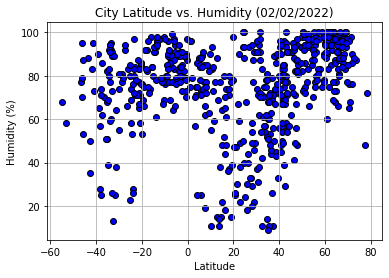

This scatter plot shows that it is difficult to determine a relationship between latitude and Humidity.There are many data points with 100% humidity, and various clusters forming around the 60 to 80 degrees latitude data points.


<Figure size 432x288 with 0 Axes>

In [63]:
# Create a scatter plot for latitude vs humidity
plt.scatter(weather_DF["Latitude"], weather_DF["Humidity"], facecolors="blue", marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (02/02/2022)")
plt.grid()

plt.show()
print("This scatter plot shows that it is difficult to determine a relationship between latitude and Humidity.There are many data points with 100% humidity, and various clusters forming around the 60 to 80 degrees latitude data points.")
# save plot as png file
plt.savefig("Latitude_vs_Humidity.png")


## Latitude vs. Cloudiness Plot

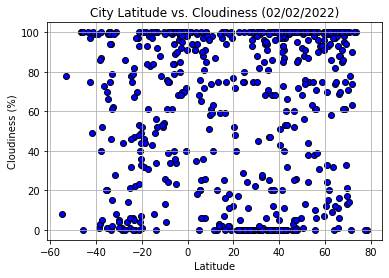

This scatter plot shows that it is difficult to determine a relationship between latitude and Cloudiness. There are many data points with either 0% cloudiness, ~80% cloudiness, and 90% humidity. 


<Figure size 432x288 with 0 Axes>

In [64]:
# Create a scatter plot for latitude vs cloudiness
plt.scatter(weather_DF["Latitude"], weather_DF["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (02/02/2022)")
plt.grid()

plt.show()
print("This scatter plot shows that it is difficult to determine a relationship between latitude and Cloudiness. There are many data points with either 0% cloudiness, ~80% cloudiness, and 90% humidity. ")
# save plot as png file
plt.savefig("Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

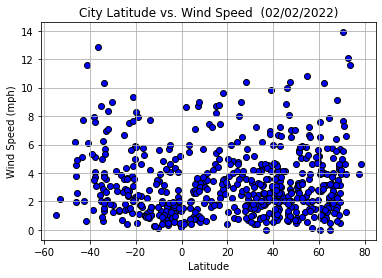

This scatter plot shows that it is difficult to determine a relationship between latitude and wind speed. There are many data points in the northern hemisphere that are reporting wind speeds of 0 - 15 mph.


<Figure size 432x288 with 0 Axes>

In [65]:
# Create a scatter plot for latitude vs wind speed
plt.scatter(weather_DF["Latitude"], weather_DF["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed  (02/02/2022)")
plt.grid()

plt.show()
print("This scatter plot shows that it is difficult to determine a relationship between latitude and wind speed. There are many data points in the northern hemisphere that are reporting wind speeds of 0 - 15 mph.")
# save plot as png file
plt.savefig("Latitude_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7075883906337597


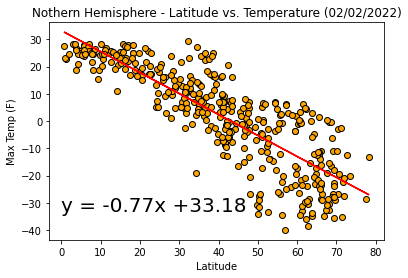

<Figure size 432x288 with 0 Axes>

In [66]:
# create dataframe for northern hemisphere
nhDF = weather_DF.loc[weather_DF["Latitude"] >= 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = nhDF["Latitude"]
y_values = nhDF["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="orange", marker="o", edgecolor="black")
plt.annotate(line_eq,(0,-33),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Nothern Hemisphere - Latitude vs. Temperature (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Nothern_Hemisphere_Latitude_vs_Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.26829335772824825


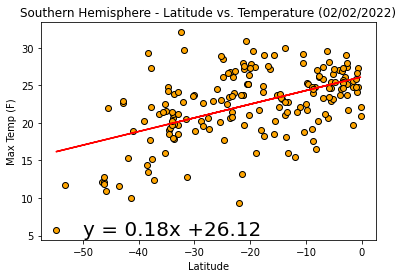

<Figure size 432x288 with 0 Axes>

In [67]:
# create dataframe for southern hemisphere
shDF = weather_DF.loc[weather_DF["Latitude"] <= 0]

# Create a scatter plot for latitude vs temperature for southern hemisphere
x_values = shDF["Latitude"]
y_values = shDF["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="orange", marker="o", edgecolor="black")
plt.annotate(line_eq,(-50,5),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Latitude vs. Temperature (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Southern_Hemisphere_Latitude_vs_Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1932268142862668


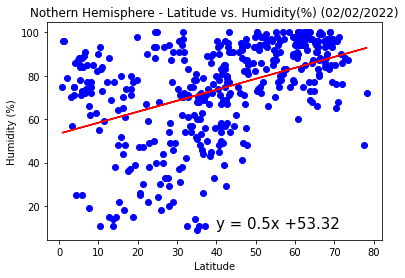

<Figure size 432x288 with 0 Axes>

In [68]:
# Create a scatter plot for latitude vs Humidity for northern hemisphere
x_values = nhDF["Latitude"]
y_values = nhDF["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="blue", marker="o", edgecolor="blue")
plt.annotate(line_eq,(40,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Nothern Hemisphere - Latitude vs. Humidity(%) (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Nothern_Hemisphere_Latitude_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13632571432779772


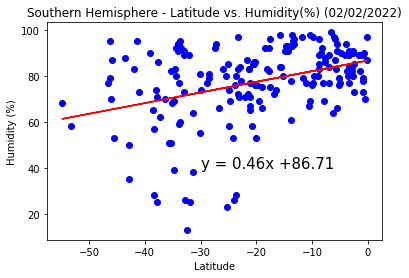

<Figure size 432x288 with 0 Axes>

In [74]:
# Create a scatter plot for latitude vs Humidity for northern hemisphere
x_values = shDF["Latitude"]
y_values = shDF["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="blue", marker="o", edgecolor="blue")
plt.annotate(line_eq,(-30,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Latitude vs. Humidity(%) (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Southern_Hemisphere_Latitude_vs_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.030621564523233846


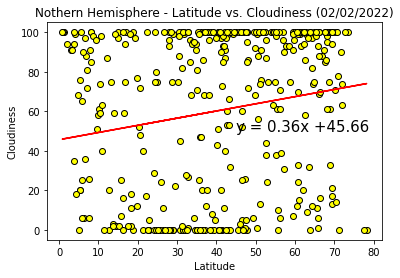

<Figure size 432x288 with 0 Axes>

In [70]:
# Create a scatter plot for latitude vs Humidity for northern hemisphere
x_values = nhDF["Latitude"]
y_values = nhDF["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="yellow", marker="o", edgecolor="black")
plt.annotate(line_eq,(45,50),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Nothern Hemisphere - Latitude vs. Cloudiness (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Nothern_Hemisphere_Latitude_vs_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04229611054380065


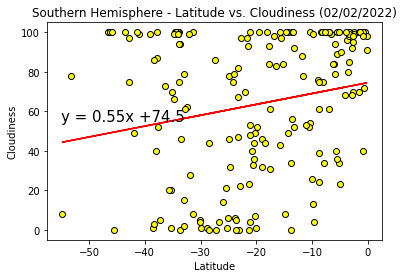

<Figure size 432x288 with 0 Axes>

In [71]:
# Create a scatter plot for latitude vs Humidity for northern hemisphere
x_values = shDF["Latitude"]
y_values = shDF["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="yellow", marker="o", edgecolor="black")
plt.annotate(line_eq,(-55,55),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Latitude vs. Cloudiness (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Southern_Hemisphere_Latitude_vs_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0038376598039422294


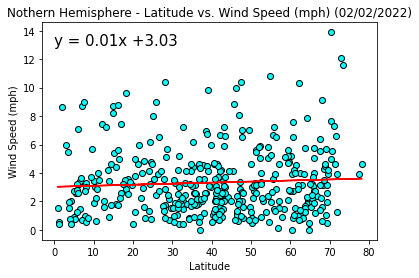

<Figure size 432x288 with 0 Axes>

In [75]:
# Create a scatter plot for latitude vs Humidity for northern hemisphere
x_values = nhDF["Latitude"]
y_values = nhDF["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="cyan", marker="o", edgecolor="black")
plt.annotate(line_eq,(0,13),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Nothern Hemisphere - Latitude vs. Wind Speed (mph) (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Nothern_Hemisphere_Latitude_vs_Wind_Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12582340400755235


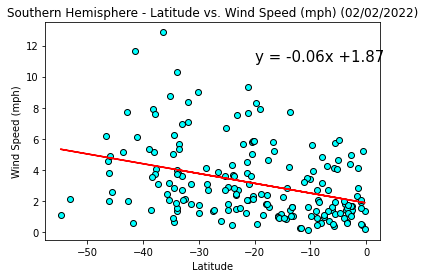

<Figure size 432x288 with 0 Axes>

In [76]:
# Create a scatter plot for latitude vs Humidity for northern hemisphere
x_values = shDF["Latitude"]
y_values = shDF["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
plt.scatter(x_values,y_values, facecolors="cyan", marker="o", edgecolor="black")
plt.annotate(line_eq,(-20,11),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Latitude vs. Wind Speed (mph) (02/02/2022)")
plt.plot(x_values,regress_values,"r-")

plt.show()
plt.savefig("Southern_Hemisphere_Latitude_vs_Wind_Speed.png")